# **Business Case: Yulu - Hypothesis Testing**
## **About Yulu**
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## **Problem Statement**
The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2. How well those variables describe the electric cycle demands

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [104]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 12.2MB/s]


In [105]:
df = pd.read_csv("bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [107]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [108]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [109]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [110]:
## Change the season data from numeric to categorical
season_data = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}
df["season"].replace(season_data, inplace = True)
df["season"].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

In [111]:
## Change the holiday data from numeric to categorical
Holiday_data = {
    0: "No Holiday",
    1: "Holiday",
}
df["holiday"].replace(Holiday_data, inplace = True)
df["holiday"].value_counts()

No Holiday    10575
Holiday         311
Name: holiday, dtype: int64

In [112]:
## Change the working day data from numeric to categorical
WorkingDay_data = {
    0: "Non Working Day",
    1: "Working Day",
}
df["workingday"].replace(WorkingDay_data, inplace = True)
df["workingday"].value_counts()

Working Day        7412
Non Working Day    3474
Name: workingday, dtype: int64

In [113]:
## Change the weather data from numeric to categorical
weather_data = {
    1: "Clear or Few Clouds",
    2: "Mist and Cloudy",
    3: "Light Rain",
    4: "Heavy Rain"
}
df["weather"].replace(weather_data, inplace = True)
df["weather"].value_counts()

Clear or Few Clouds    7192
Mist and Cloudy        2834
Light Rain              859
Heavy Rain                1
Name: weather, dtype: int64

In [114]:
#Converting datetime column data type to datetime64
df["datetime"] = pd.to_datetime(df["datetime"])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


# **Exploratory Data Analysis**

In [116]:
#Creating a New Column of Month and Year
df["Year-Month"] = df["datetime"].dt.strftime("%y-%m")
df["Year-Month"] = df["datetime"].dt.strftime("%y-%m")


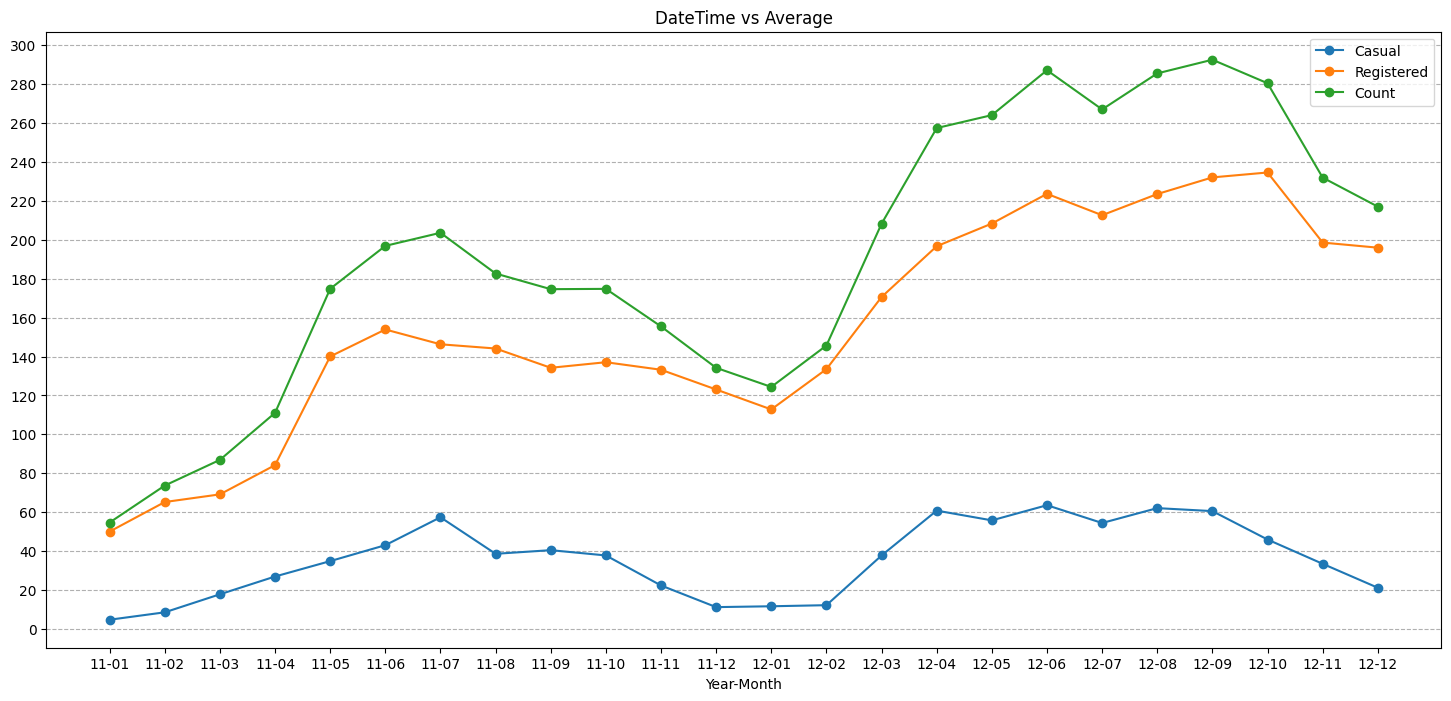

In [117]:
# The below code visualizes the trend of the monthly average values for the 'casual', 'registered',
# and 'count' variables,  allowing for easy comparison and analysis of their patterns over time
plt.figure(figsize = (18,8))
plt.plot(df.groupby("Year-Month")["casual"].mean(), marker = "o", label = "Casual")
plt.plot(df.groupby("Year-Month")["registered"].mean(), marker = "o", label = "Registered")
plt.plot(df.groupby("Year-Month")["count"].mean(), marker = "o", label = "Count")
plt.title("DateTime vs Average")
plt.yticks(np.arange(0,301,20))
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel("Year-Month")
plt.legend()
plt.show()

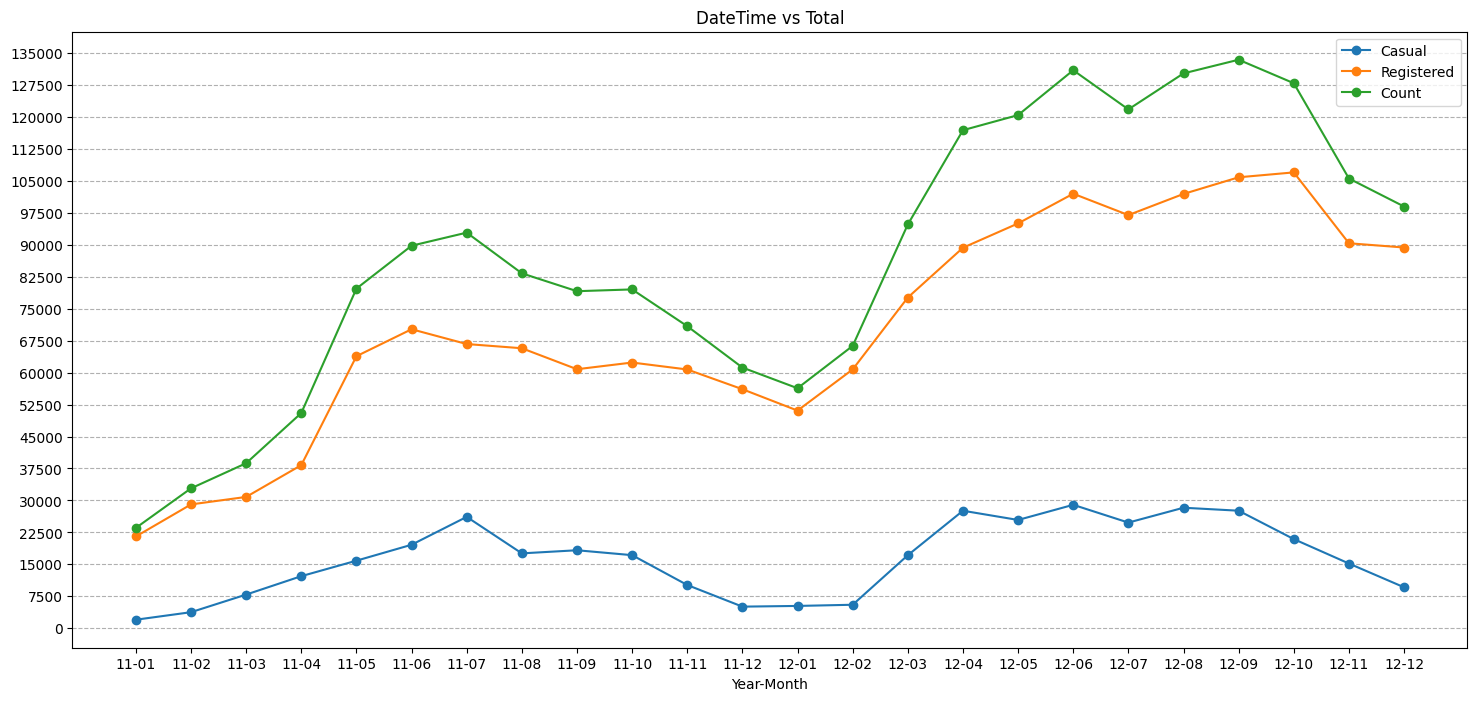

In [118]:
# The below code visualizes the trend of the monthly Total values for the 'casual', 'registered',
# and 'count' variables,  allowing for easy comparison and analysis of their patterns over time
plt.figure(figsize = (18,8))
plt.plot(df.groupby("Year-Month")["casual"].sum(), marker = "o", label = "Casual")
plt.plot(df.groupby("Year-Month")["registered"].sum(), marker = "o", label = "Registered")
plt.plot(df.groupby("Year-Month")["count"].sum(), marker = "o", label = "Count")
plt.title("DateTime vs Total")
plt.yticks(np.arange(0,140001,7500))
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel("Year-Month")
plt.legend()
plt.show()

In [119]:
## Calculate Year on Year Growth in average count

yoy = df.groupby(df["datetime"].dt.year)["count"].mean().reset_index()
yoy["prev_count"] = yoy["count"].shift(1)
yoy["prev_count"].fillna(0)
yoy["growth(%)"] = ((yoy["count"] - yoy["prev_count"])*100)/yoy["prev_count"]
yoy

,datetime,count,prev_count,growth(%)
0,2011,144.223349,NaN,NaN
1,2012,238.560944,144.223349,65.410764


In [120]:
## Calculate Month on Month Growth of 2011 in average count

mom_2011 = df[df["datetime"].dt.year == 2011].groupby(df["datetime"].dt.month)["count"].mean().reset_index()
mom_2011["prev_count"] = mom_2011["count"].shift(1)
mom_2011["prev_count"].fillna(0)
mom_2011["growth(%)"] = ((mom_2011["count"] - mom_2011["prev_count"])*100)/mom_2011["prev_count"]
mom_2011

,datetime,count,prev_count,growth(%)
0,1,54.645012,NaN,NaN
1,2,73.641256,54.645012,34.762997
2,3,86.849776,73.641256,17.936305
3,4,111.026374,86.849776,27.837260
4,5,174.809211,111.026374,57.448365
5,6,196.877193,174.809211,12.624039
6,7,203.614035,196.877193,3.421850
7,8,182.666667,203.614035,-10.287782
8,9,174.622517,182.666667,-4.403732
9,10,174.773626,174.622517,0.086535


In [121]:
## Calculate Month on Month Growth of 2012 in average count

mom_2012 = df[df["datetime"].dt.year == 2012].groupby(df["datetime"].dt.month)["count"].mean().reset_index()
mom_2012["prev_count"] = mom_2012["count"].shift(1)
mom_2012["prev_count"].fillna(0)
mom_2012["growth(%)"] = ((mom_2012["count"] - mom_2012["prev_count"])*100)/mom_2012["prev_count"]
mom_2012

,datetime,count,prev_count,growth(%)
0,1,124.353201,NaN,NaN
1,2,145.646154,124.353201,17.122963
2,3,208.276923,145.646154,43.002007
3,4,257.455947,208.276923,23.612325
4,5,264.109649,257.455947,2.584404
5,6,287.186404,264.109649,8.737566
6,7,267.037281,287.186404,-7.016043
7,8,285.570175,267.037281,6.940190
8,9,292.598684,285.570175,2.461219
9,10,280.508772,292.598684,-4.131909


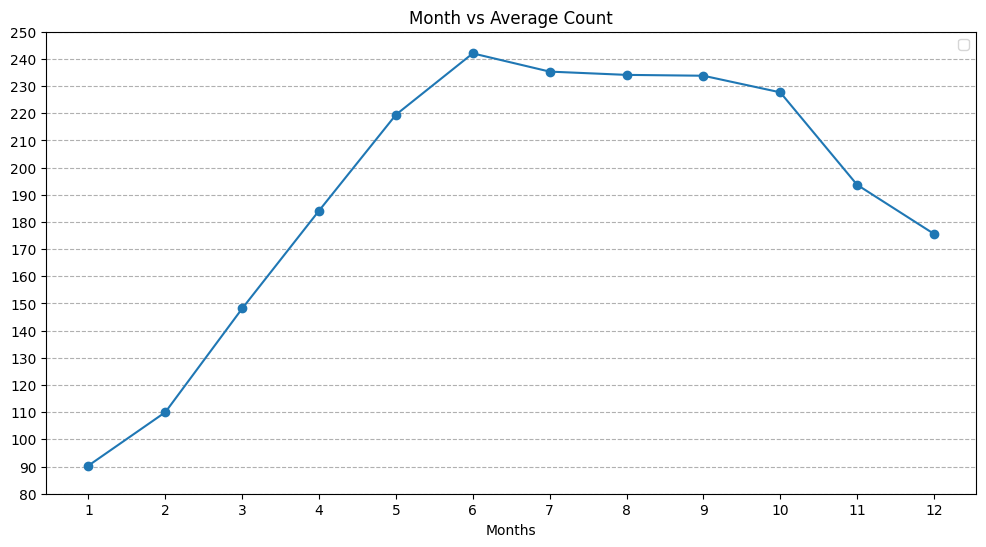

In [122]:
### Average Count of renting bikes (Month over Month)
plt.figure(figsize = (12,6))
plt.plot(df.groupby(df["datetime"].dt.month)["count"].mean(), marker = "o")
plt.title("Month vs Average Count")
plt.yticks(np.arange(80,251,10))
plt.xticks(np.arange(1,13))
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel("Months")
plt.legend()
plt.show()

In [123]:
### The distribution of average count of rental bikes on an hourly basis in a single day
hoh = df.groupby(df["datetime"].dt.hour)["count"].mean().reset_index()
hoh["prev_count"] = hoh["count"].shift(1)
hoh["prev_count"].fillna(0)
hoh["growth(%)"] = ((hoh["count"] - hoh["prev_count"])*100)/hoh["prev_count"]
hoh

,datetime,count,prev_count,growth(%)
0,0,55.138462,NaN,NaN
1,1,33.859031,55.138462,-38.592718
2,2,22.899554,33.859031,-32.367959
3,3,11.757506,22.899554,-48.656179
4,4,6.407240,11.757506,-45.505110
5,5,19.767699,6.407240,208.521293
6,6,76.259341,19.767699,285.777526
7,7,213.116484,76.259341,179.462793
8,8,362.769231,213.116484,70.221104
9,9,221.780220,362.769231,-38.864655


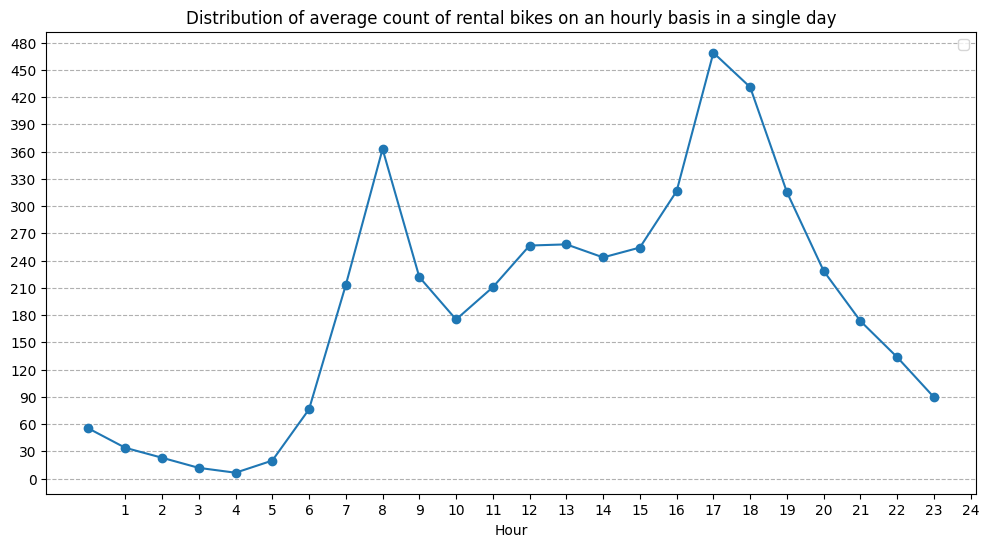

In [124]:
plt.figure(figsize = (12,6))
plt.plot(df.groupby(df["datetime"].dt.hour)["count"].mean(), marker = "o")
plt.title("Distribution of average count of rental bikes on an hourly basis in a single day")
plt.yticks(np.arange(0,481,30))
plt.xticks(np.arange(1,25,1))
plt.grid(axis = 'y', linestyle = '--')
plt.xlabel("Hour")
plt.legend()
plt.show()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  Year-Month  10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1.1+ MB


In [126]:
### Updating Columns DataTypes
a = ["season","holiday","workingday","weather"]
for i in a:
  df[a] = df[a].astype("category")

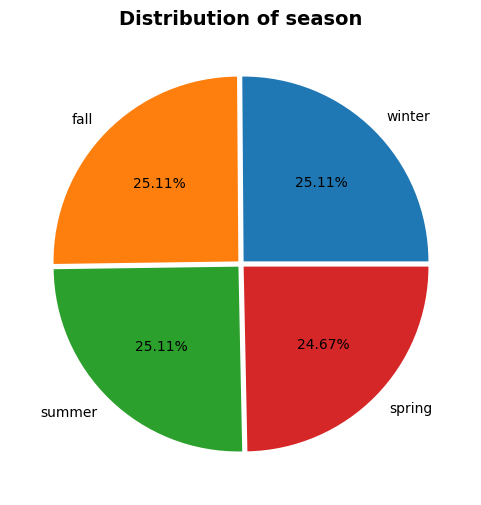

In [127]:
# Distribution of season
plt.figure(figsize = (6, 6))
plt.pie(df["season"].value_counts(), labels = df["season"].value_counts().index, autopct = "%2.2f%%", explode = (0.02,0.02,0.02,0.02))
plt.title('Distribution of season', fontdict = {'fontsize' : 14, 'fontweight' : 600})
plt.show()

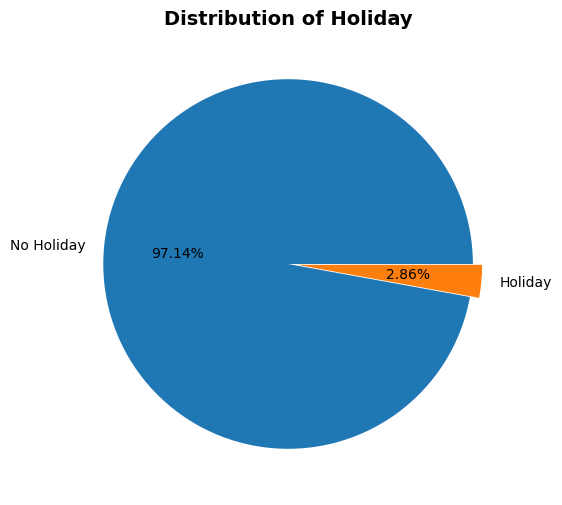

In [128]:
# Distribution of Holiday
plt.figure(figsize = (6, 6))
plt.pie(df["holiday"].value_counts(), labels = df["holiday"].value_counts().index, autopct = "%2.2f%%", explode = (0,0.05))
plt.title('Distribution of Holiday', fontdict = {'fontsize' : 14, 'fontweight' : 600})
plt.show()

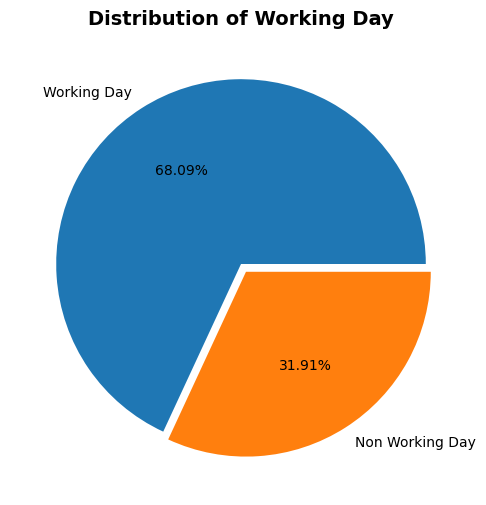

In [129]:
# Distribution of Working Days
plt.figure(figsize = (6, 6))
plt.pie(df["workingday"].value_counts(), labels = df["workingday"].value_counts().index, autopct = "%2.2f%%", explode = (0,0.05))
plt.title('Distribution of Working Day', fontdict = {'fontsize' : 14, 'fontweight' : 600})
plt.show()

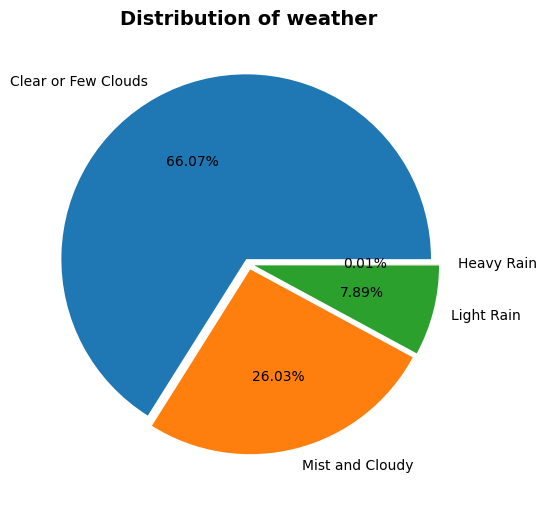

In [130]:
# Distribution of Weather
plt.figure(figsize = (6, 6))
plt.pie(df["weather"].value_counts(), labels = df["weather"].value_counts().index, autopct = "%2.2f%%", explode = (0.03,0.03,0.03,0.03))
plt.title('Distribution of weather', fontdict = {'fontsize' : 14, 'fontweight' : 600})
plt.show()

**Univariate Analysis**



[]

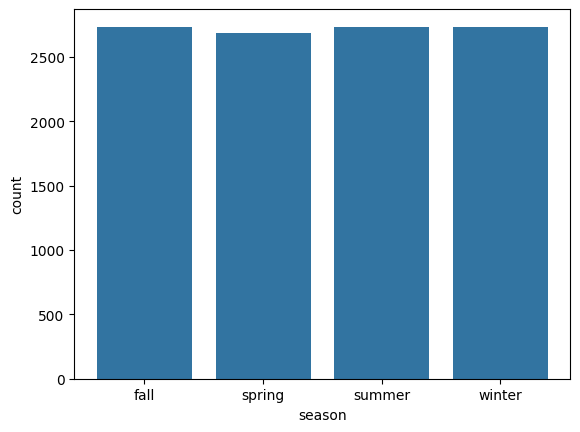

In [131]:
### Distribution of Season in DataSet
sns.countplot(data = df, x = 'season')
plt.plot()

[]

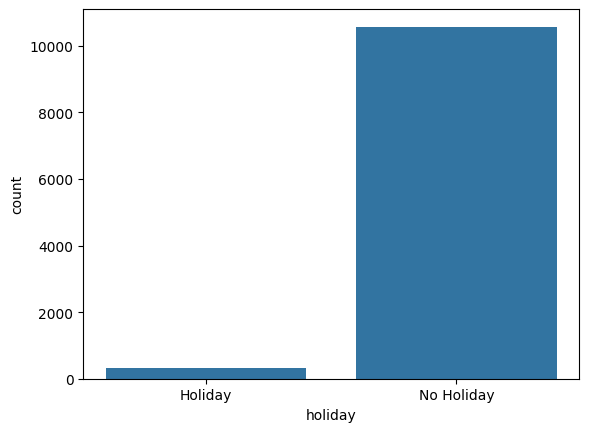

In [132]:
### Distribution of Working Day in DataSet
sns.countplot(data = df, x = 'holiday')
plt.plot()

[]

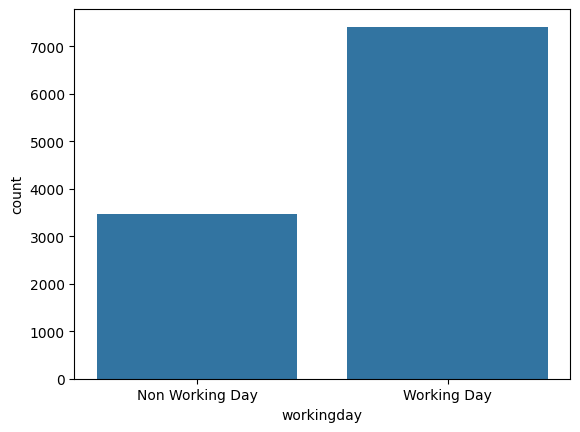

In [133]:
### Distribution of Season in DataSet
sns.countplot(data = df, x = 'workingday')
plt.plot()

[]

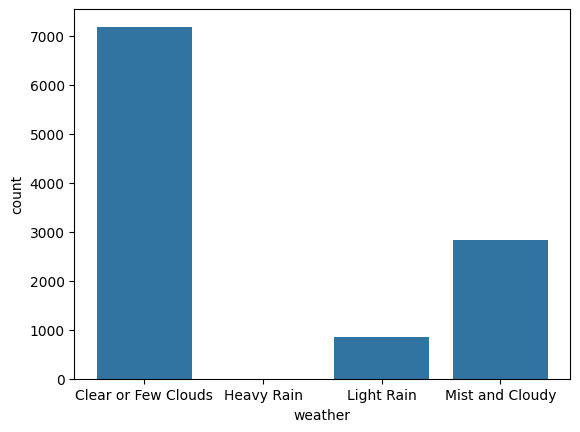

In [134]:
### Distribution of Season in Weather
sns.countplot(data = df, x = 'weather')
plt.plot()

[]

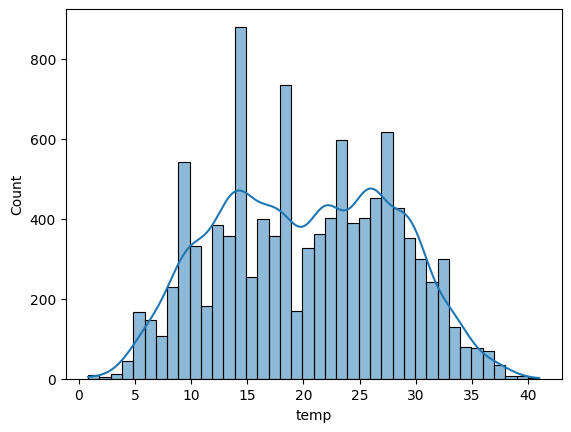

In [135]:
# Temperature Distribution of the DataSet
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()

In [136]:
# Mean and Standard Deviation of temp column
df["temp"].aggregate(["mean","std"]).round(2).reset_index().rename(columns = {'index':'Aggregation',"temp":"Value"})

,Aggregation,Value
0,mean,20.23
1,std,7.79


[]

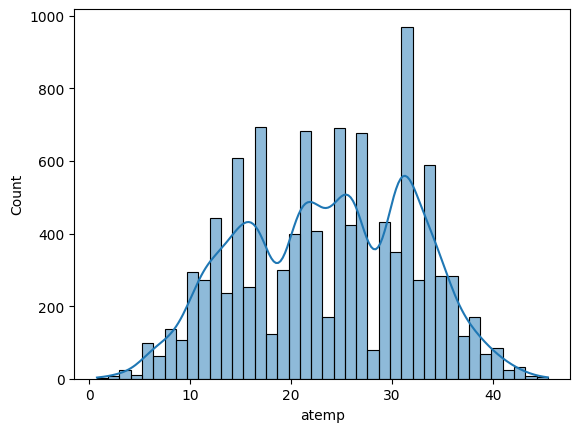

In [137]:
# ATemperature Distribution of the DataSet
sns.histplot(data = df, x = 'atemp', kde = True, bins = 40)
plt.plot()

In [138]:
# Mean and Standard Deviation of atemp column
df["atemp"].aggregate(["mean","std"]).round(2).reset_index().rename(columns = {'index':'Aggregation',"atemp":"Value"})

,Aggregation,Value
0,mean,23.66
1,std,8.47


[]

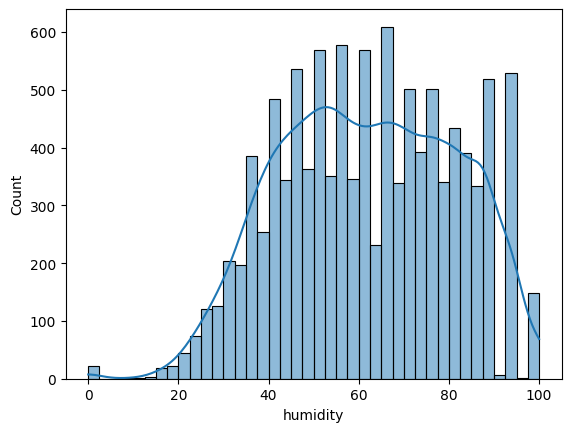

In [139]:
# Humidity Distribution of the DataSet
sns.histplot(data = df, x = 'humidity', kde = True, bins = 40)
plt.plot()

In [140]:
# Mean and Standard Deviation of Humidity column
df["humidity"].aggregate(["mean","std"]).round(2).reset_index().rename(columns = {'index':'Aggregation',"humidity":"Value"})

,Aggregation,Value
0,mean,61.89
1,std,19.25


[]

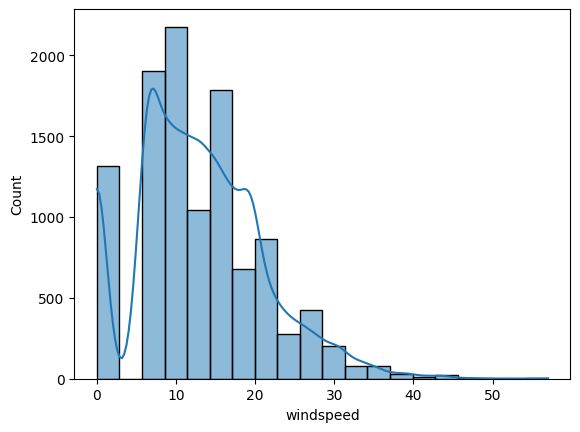

In [141]:
# Windspeed Distribution of the DataSet
sns.histplot(data = df, x = 'windspeed', kde = True, bins = 20)
plt.plot()

In [142]:
# Mean and Standard Deviation of Windspeed column
df["windspeed"].aggregate(["mean","std"]).round(2).reset_index().rename(columns = {'index':'Aggregation',"windspeed":"Value"})

,Aggregation,Value
0,mean,12.80
1,std,8.16


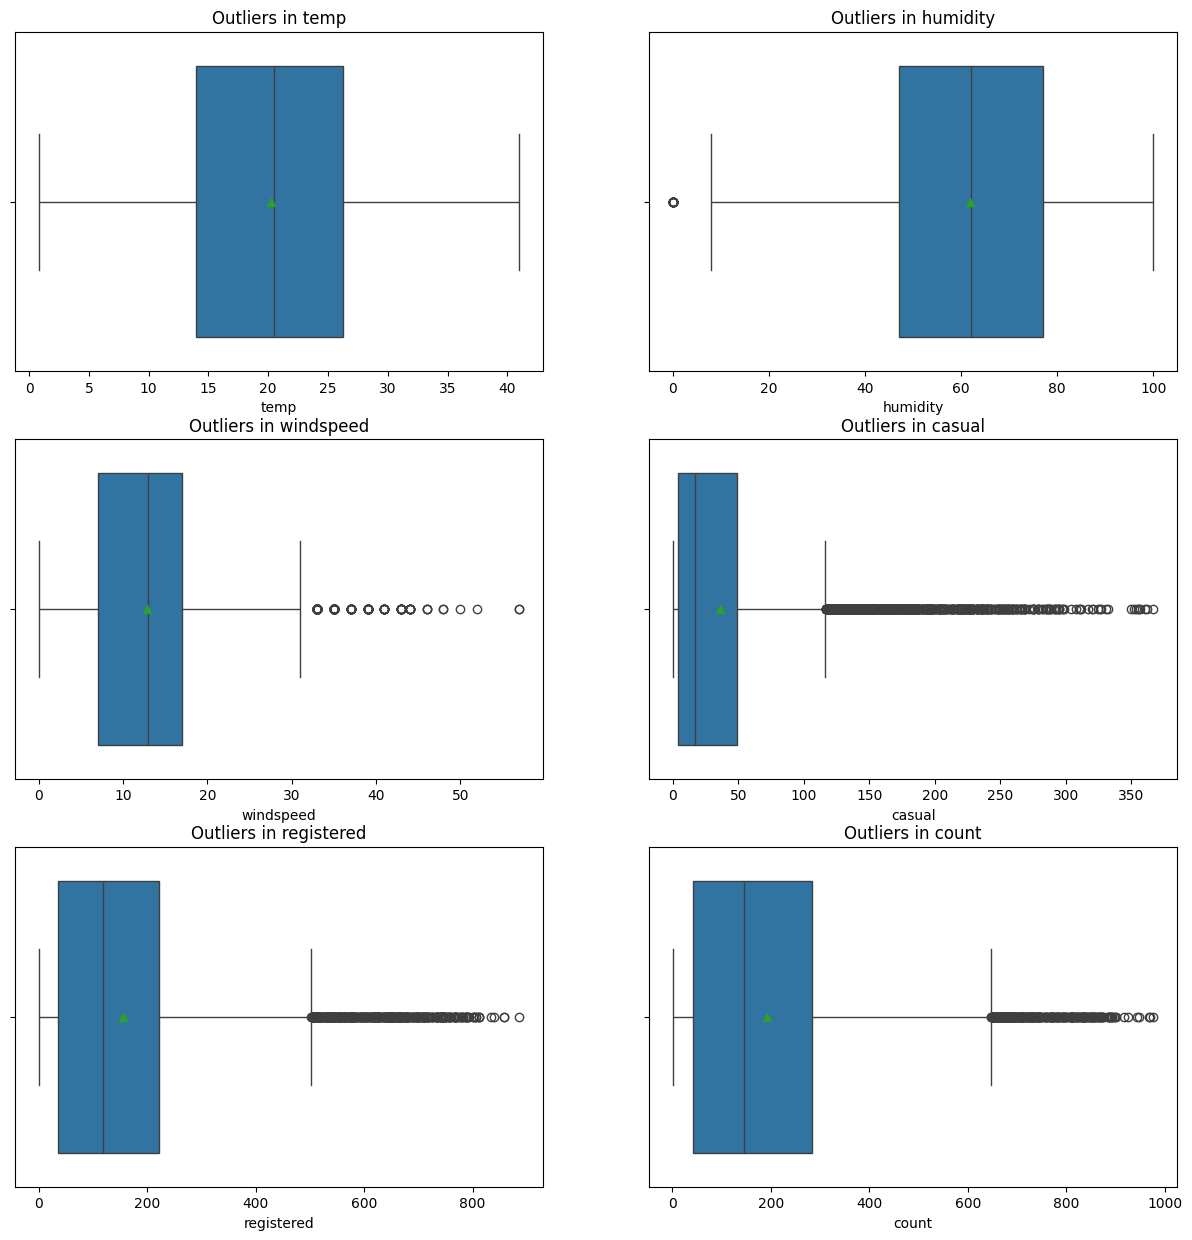

In [143]:
#Boxplot for outlier detection
plt.figure(figsize = (15,15))
cnt = 1
for column in ["temp","humidity","windspeed","casual","registered","count"]:
  plt.subplot(3,2,cnt)
  sns.boxplot(data = df, x = column, showmeans = True)
  plt.title(f"Outliers in {column}")
  cnt += 1

**Bivariate Analysis**

[]

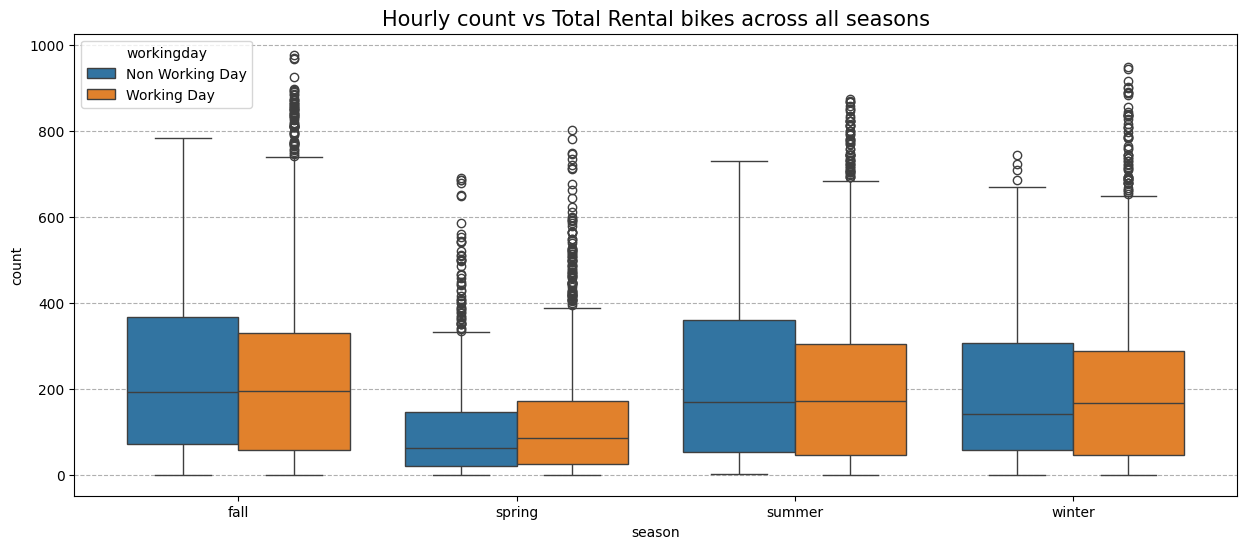

In [144]:
### Hourly count vs Total Rental bikes across all seasons
plt.figure(figsize = (15, 6))
plt.title('Hourly count vs Total Rental bikes across all seasons',fontdict = {'size' : 15})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday')
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

[]

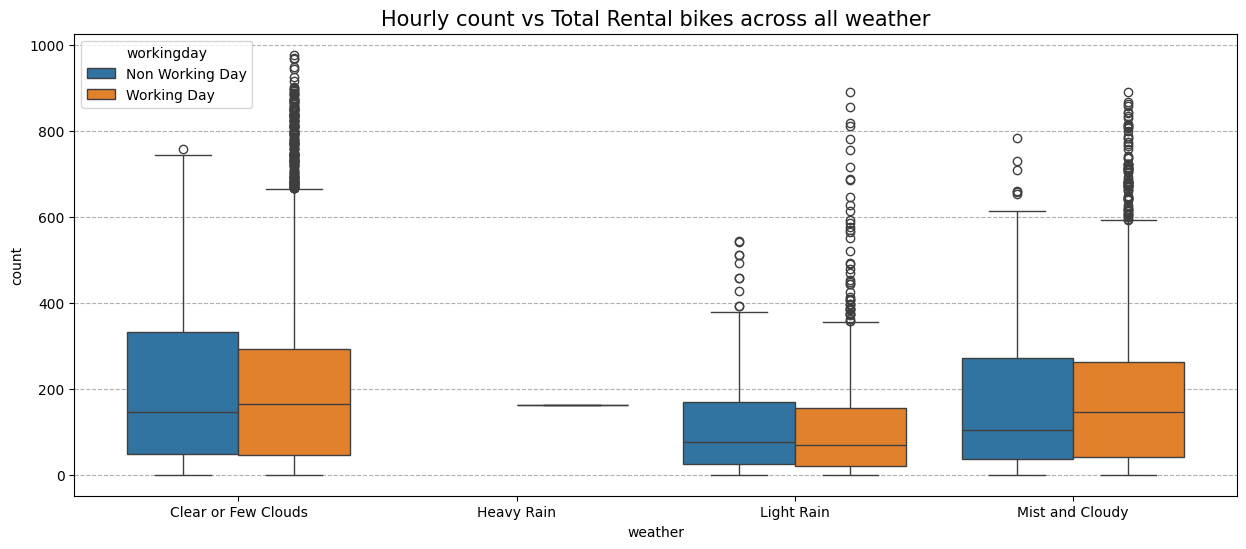

In [145]:
### Hourly count vs Total Rental bikes across all weathers
plt.figure(figsize = (15, 6))
plt.title('Hourly count vs Total Rental bikes across all weather',fontdict = {'size' : 15})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday')
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

# **Correlation**

[]

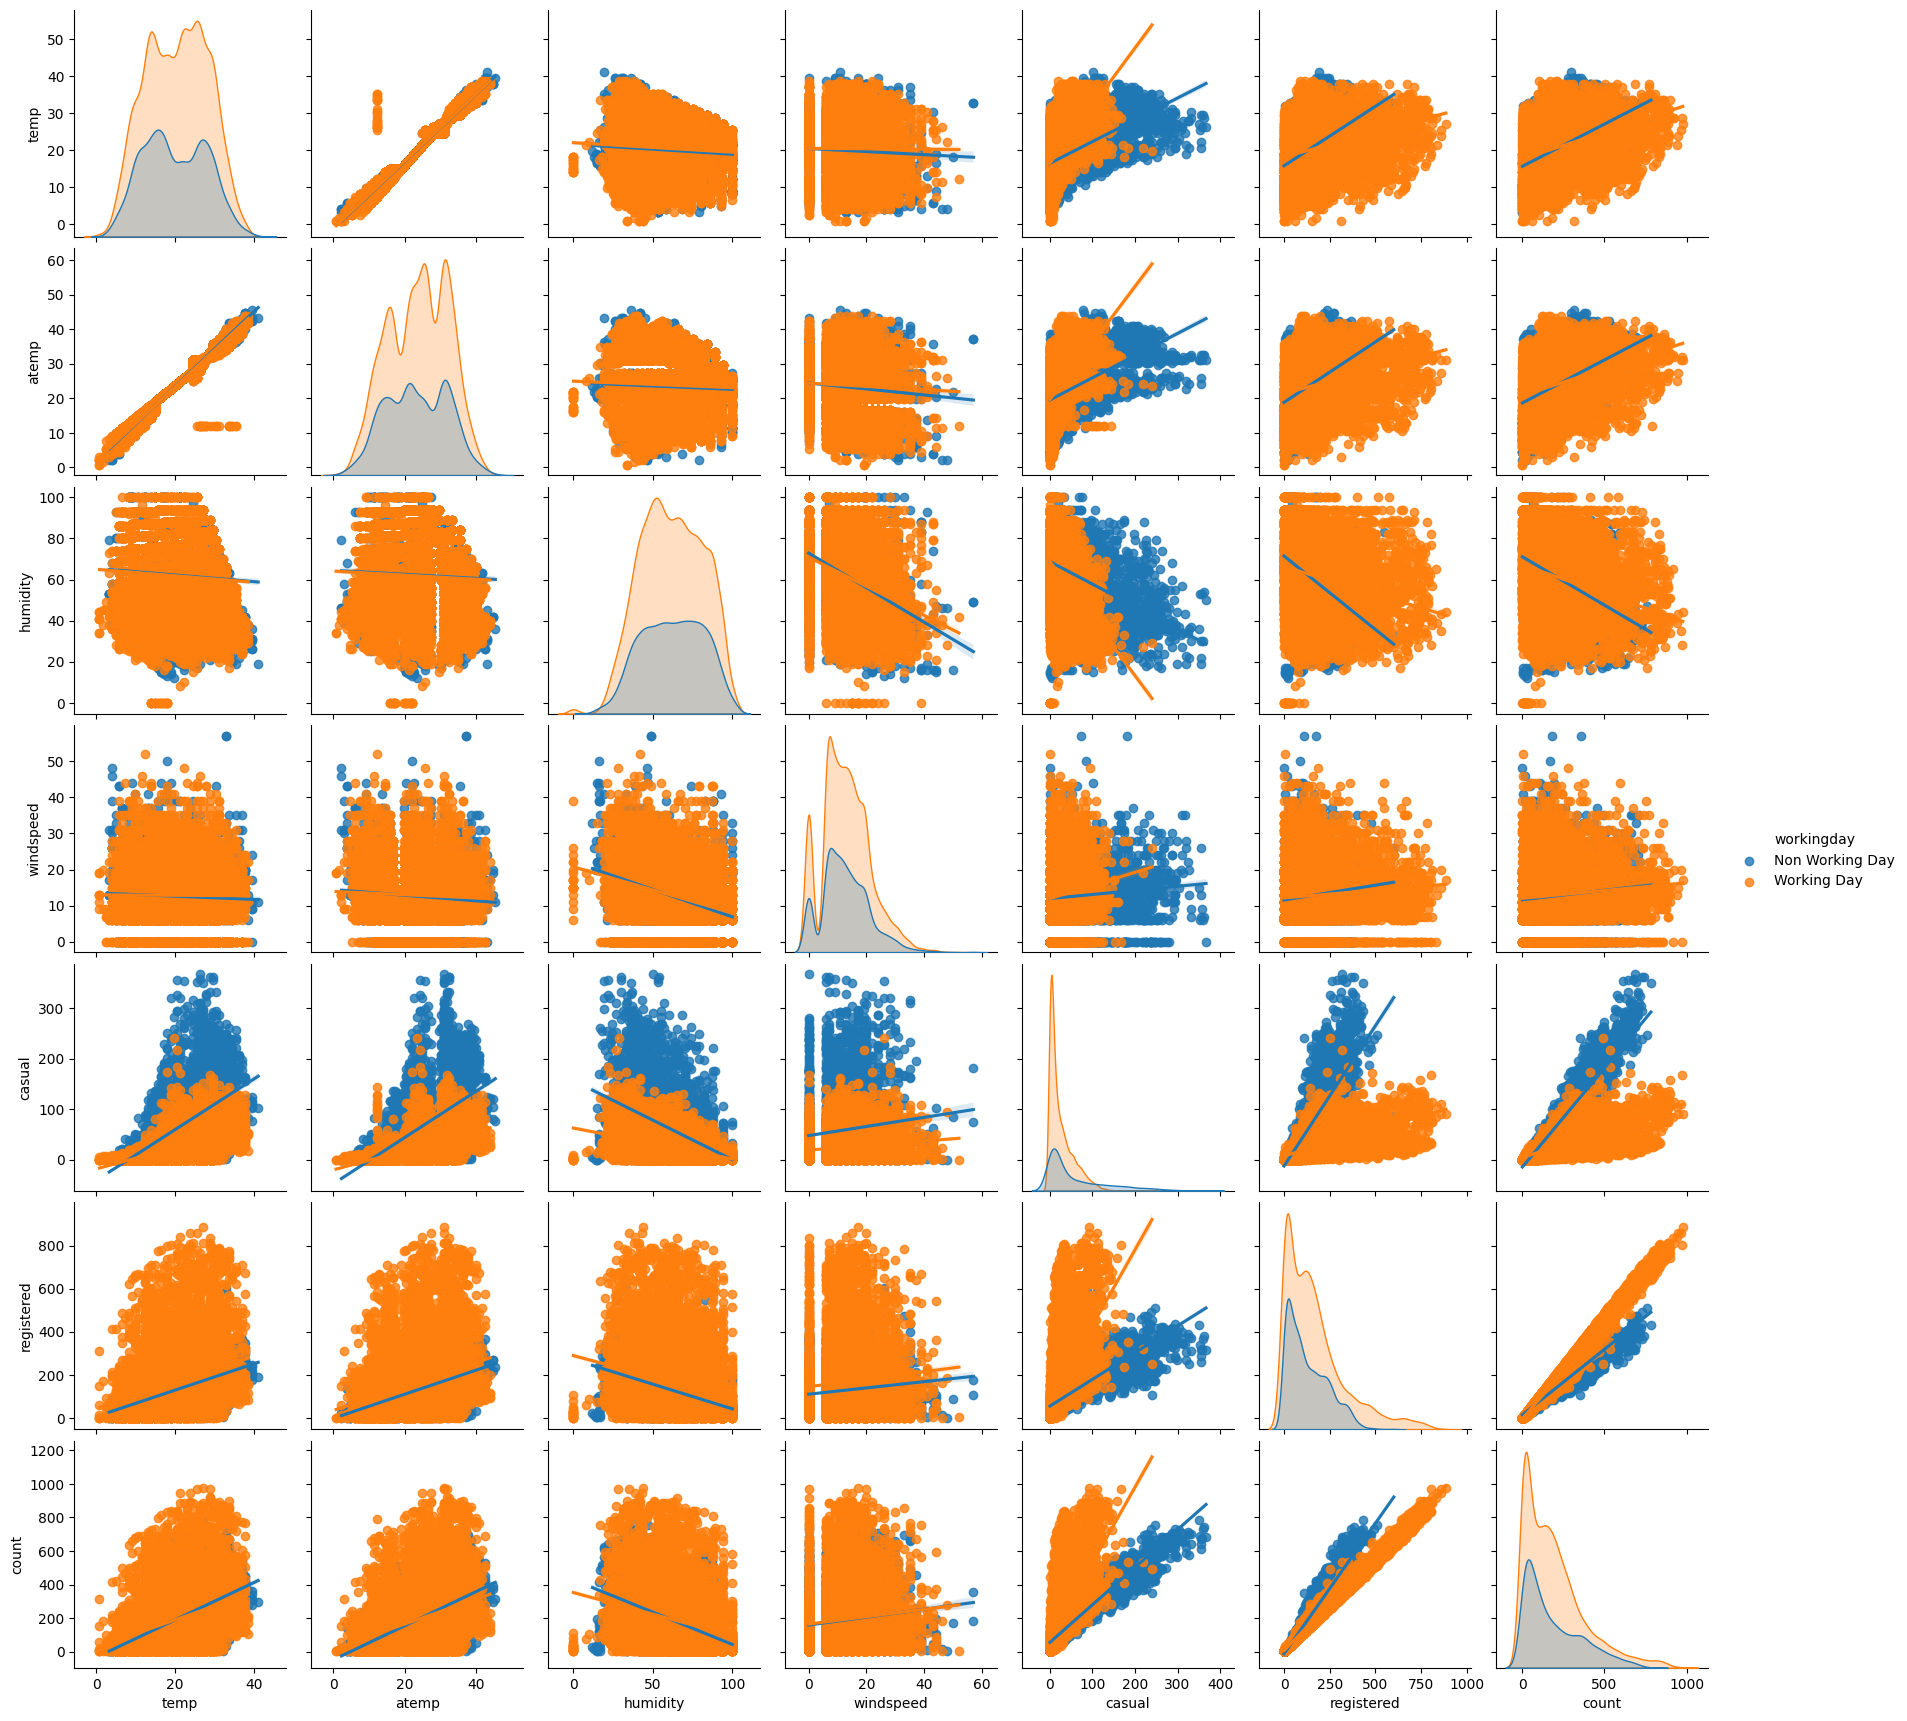

In [275]:
sns.pairplot(data = df, kind = 'reg', hue = 'workingday')
plt.plot()

<ipython-input-276-e8af14b2963e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


[]

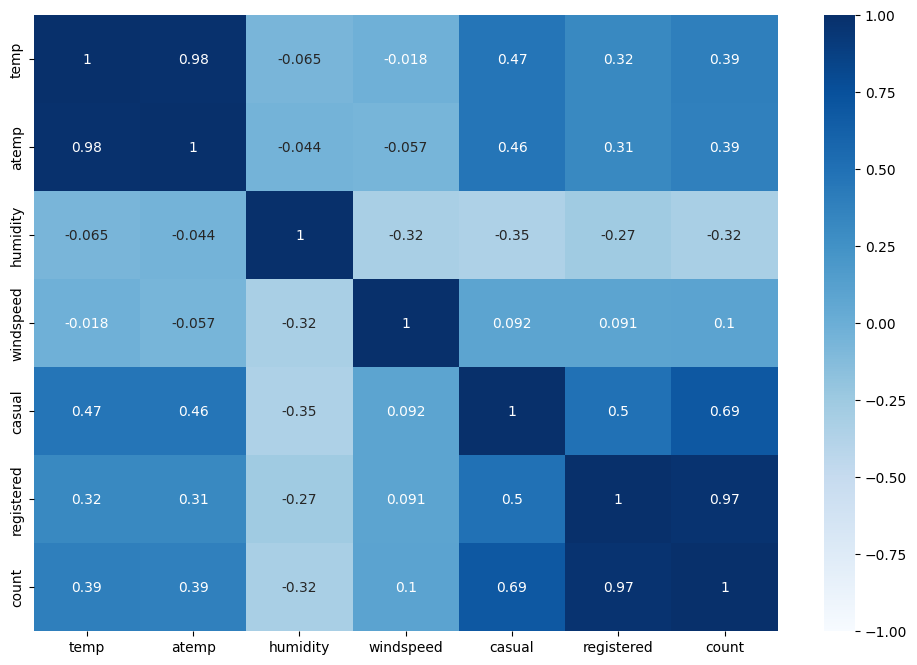

In [276]:
corr_data = df.corr()
corr_data

plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Blues', annot = True, vmin = -1, vmax = 1)
plt.plot()



*   Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count,registered]
*   High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
*   Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
*   Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
*   Negligible correlation exists between all other combinations of columns.


# Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [146]:
df["workingday"].value_counts().reset_index().rename(columns = {"index":"Day","workingday":"Count"})

,Day,Count
0,Working Day,7412
1,Non Working Day,3474


<Axes: xlabel='workingday', ylabel='count'>

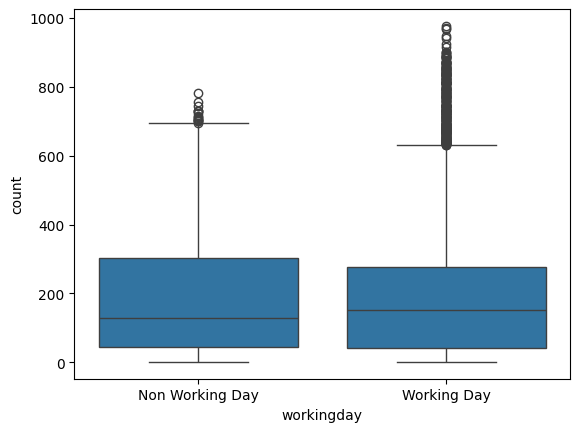

In [148]:
sns.boxplot(data = df, x = "workingday", y = "count")

**STEP-1** : Set up Null Hypothesis

Null Hypothesis (H0) - Working Day does not have any effect on the number of electric cycles rented.

Alternate Hypothesis (HA) - Working Day has some effect on the number of electric cycles rented


**STEP-2**: Define Test statistics

If the assumptions of T Test are met then we can proceed performing T Test for independent samples


**STEP-3**: Compute the p-value and fix value of alpha.

We set our alpha to be 0.05


**STEP-4**: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0



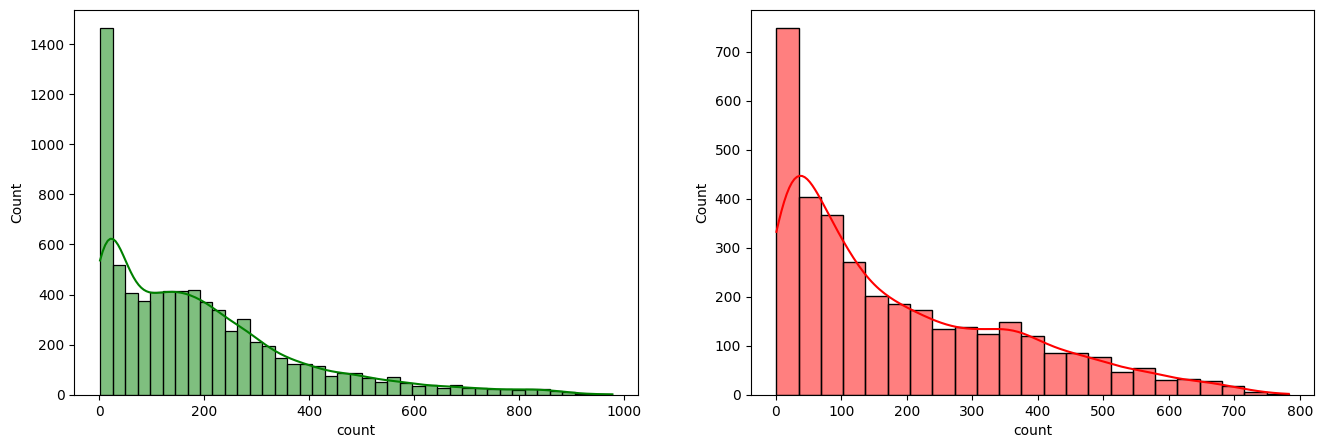

In [155]:
#### Distribution of Working and Non Working Days
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(data = df[df["workingday"] == "Working Day"], x = "count", kde = True, color = "green")

plt.subplot(1,2,2)
sns.histplot(data = df[df["workingday"] == "Non Working Day"], x = "count", kde = True, color = "red")
plt.show()

In [167]:
from scipy.stats import ttest_ind

# Sample data
group1 = df[df['workingday'] == "Working Day"]['count']
group2 = df[df['workingday'] == "Non Working Day"]['count']

# Perform independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Output the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the Null Hypothesis\nNo.of electric cycles rented is not same for working and non-working days")
else:
    print("Fail to reject the Null Hypothesis\nNo.of electric cycles rented is same for working and non-working days")


t-statistic: 1.2096277376026694
p-value: 0.22644804226361348
Fail to reject the Null Hypothesis
No.of electric cycles rented is same for working and non-working days


#**Check if the demand of bicycles on rent is the same for different Weather conditions?**

In [168]:
df["weather"].value_counts().reset_index().rename(columns = {"index":"Day","weather":"Count"})

,Day,Count
0,Clear or Few Clouds,7192
1,Mist and Cloudy,2834
2,Light Rain,859
3,Heavy Rain,1


In [186]:
df_1 = df[df["weather"] == "Clear or Few Clouds"]
df_2 = df[df["weather"] == "Mist and Cloudy"]
df_3 = df[df["weather"] == "Light Rain"]
df_4 = df[df["weather"] == "Heavy Rain"]


Considering that "Heavy Rain" occurred only once, it can be regarded as a rare event, and thus, we may choose to exclude it from the analysis.

**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather Clear or Few Clouds, Mist and Cloudy and Light Rain. (We wont be considering Heavy Rain as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for sweather Clear or Few Clouds, Mist and Cloudy and Light Rain are different.

**STEP-2** : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

**STEP-3**: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

Under H0, the test statistic should follow F-Distribution.

**STEP-4**: Decide the kind of test.

We will be performing right tailed f-test

**STEP-5**: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

**STEP-6**: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

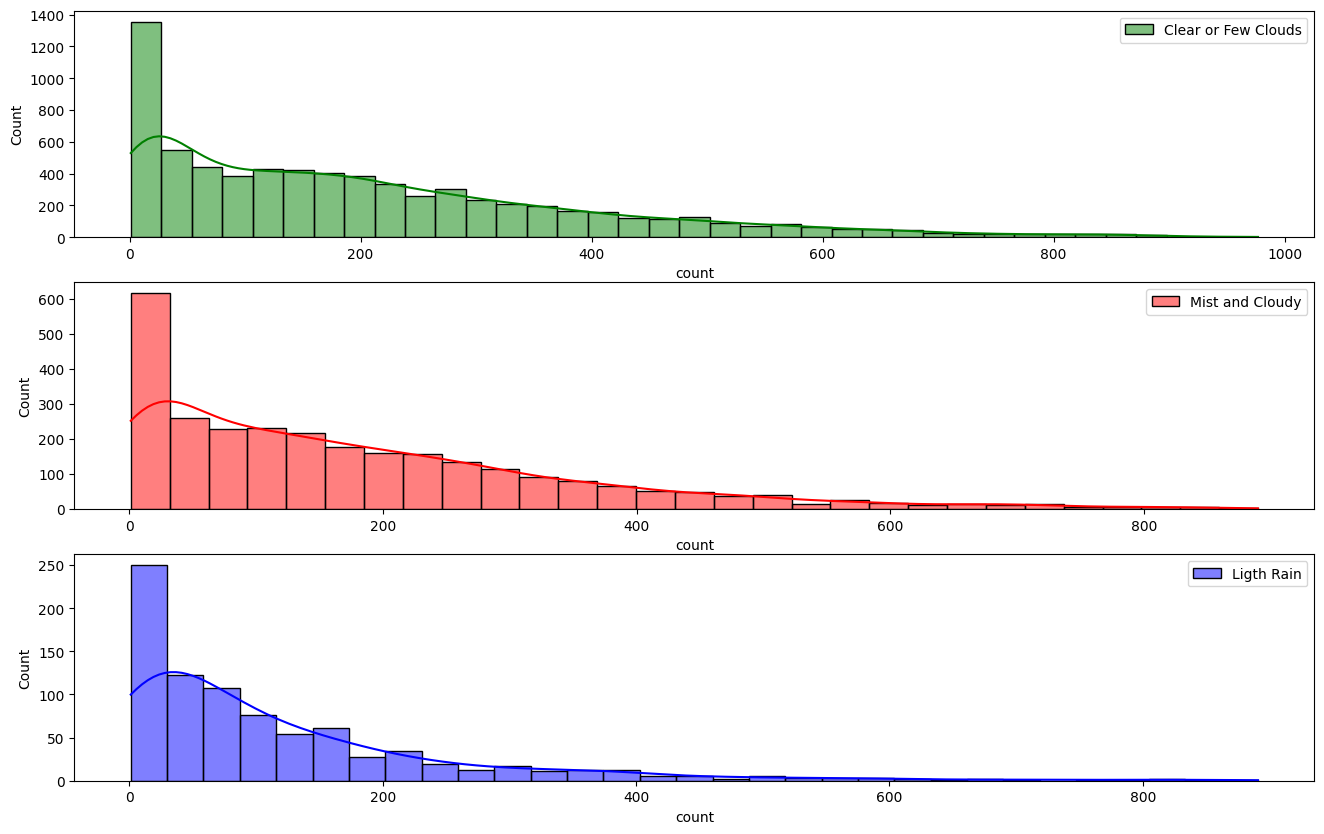

In [175]:
#### Distribution of different Weathers
plt.figure(figsize = (16,10))
plt.subplot(3,1,1)
sns.histplot(data = df[df["weather"] == "Clear or Few Clouds"], x = "count", kde = True, color = "green", label = "Clear or Few Clouds")
plt.legend()

plt.subplot(3,1,2)
sns.histplot(data = df[df["weather"] == "Mist and Cloudy"], x = "count", kde = True, color = "red", label = "Mist and Cloudy")
plt.legend()

plt.subplot(3,1,3)
sns.histplot(data = df[df["weather"] == "Light Rain"], x = "count", kde = True, color = "blue", label = "Ligth Rain")
plt.legend()
plt.show()

[]

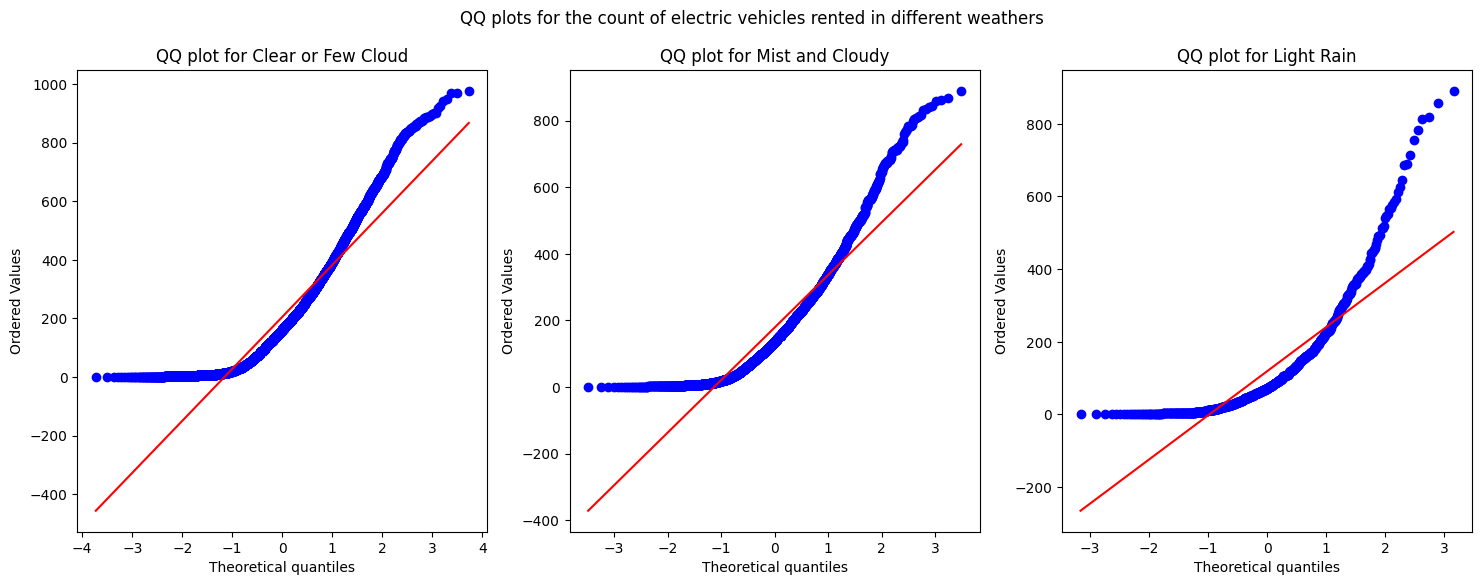

In [196]:
## Graphical Representation to check Normal Distribution

from scipy.stats import probplot

plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
probplot(df_1.loc[:, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Clear or Few Cloud')
plt.subplot(1, 3, 2)
probplot(df_2.loc[:, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Mist and Cloudy')
plt.subplot(1, 3, 3)
probplot(df_3.loc[:, 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Light Rain')
plt.plot()


*   It can be Infered that the above Distribution does\not follow Normal Distribution
*   We will confirn this with Shapiro's Test





**Shapiro Test**

In [202]:
### Shapiro Test for Clear and Few Clouds
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_1["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Clear and Few Clouds:\n{p_val}")

P-Values of Sahpiro Test for Clear and Few Clouds:
[9.412882973069969e-11, 1.5643104589457835e-09, 1.640477142149377e-12, 7.076472654382604e-12, 2.0304832034495623e-12]


In [203]:
### Shapiro Test for Mist and Cloudy
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_2["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Mist and Cloudy:\n{p_val}")

P-Values of Sahpiro Test for Mist and Cloudy:
[1.6941854169560955e-11, 1.867752306983217e-11, 1.3364673036059694e-14, 1.4444982753339386e-12, 9.436225672371235e-13]


In [204]:
### Shapiro Test for Light Rain
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_3["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Light Rain:\n{p_val}")

P-Values of Sahpiro Test for Light Rain:
[1.2472540031287075e-15, 3.512480196141073e-17, 2.85037089959618e-15, 9.767512785659681e-16, 5.915162684075629e-15]


From the above P-Values we can conclude that no Sample follows Normal Distribution

**Tranform Data using BoxCox Tranformation and perform Shapiro Test**

In [253]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_1_boxcox, lambda_1 = boxcox(df_1["count"])

### Shapiro Test for Clear and Few Clouds Weather Season Data Converted via Boxcoc
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_1_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Clear and Few Clouds:\n{p_val}")

P-Values of Sahpiro Test for Clear and Few Clouds:
[2.061217589223373e-32, 2.061217589223373e-32, 2.061217589223373e-32, 2.061217589223373e-32, 2.061217589223373e-32]


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [254]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_2_boxcox, lambda_2 = boxcox(df_2["count"])

### Shapiro Test for Mist and Cloudy Weather Season Data Converted via Boxcoc
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_2_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Mist and Cloudy:\n{p_val}")

P-Values of Sahpiro Test for Mist and Cloudy:
[1.9216098393369846e-19, 1.9216098393369846e-19, 1.9216098393369846e-19, 1.9216098393369846e-19, 1.9216098393369846e-19]


In [256]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_3_boxcox, lambda_3 = boxcox(df_3["count"])

### Shapiro Test for Light Rain Weather Data Converted via Boxcoc
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_3_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Light Rain:\n{p_val}")

P-Values of Sahpiro Test for Light Rain:
[1.4133181593933841e-06, 1.4133181593933841e-06, 1.4133181593933841e-06, 1.4133181593933841e-06, 1.4133181593933841e-06]


From the above P-Values after converting Data using boxcox transformation we can conclude that no Sample follows Normal Distribution



**Levene Test**

In [206]:
#### Levene Test
from scipy.stats import levene

test_stat, p_value = levene(df_1['count'].sample(500), df_2['count'].sample(500), df_3['count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')



p-value 1.78537511810432e-14
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [207]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
from scipy.stats import kruskal

alpha = 0.05
test_stat, p_value = kruskal(df_1["count"], df_2["count"], df_3["count"])
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45
Reject Null Hypothesis


**Therefore, the average number of rental bikes is statistically different for different weathers.**

# **Check if the demand of bicycles on rent is the same for different Seasons?**

In [210]:
df["season"].value_counts().reset_index().rename(columns = {"index":"Season","season":"Count"})

,Season,Count
0,winter,2734
1,fall,2733
2,summer,2733
3,spring,2686


In [213]:
df_winter = df[df["season"] == "winter"]
df_fall = df[df["season"] == "fall"]
df_summer = df[df["season"] == "summer"]
df_spring = df[df["season"] == "spring"]

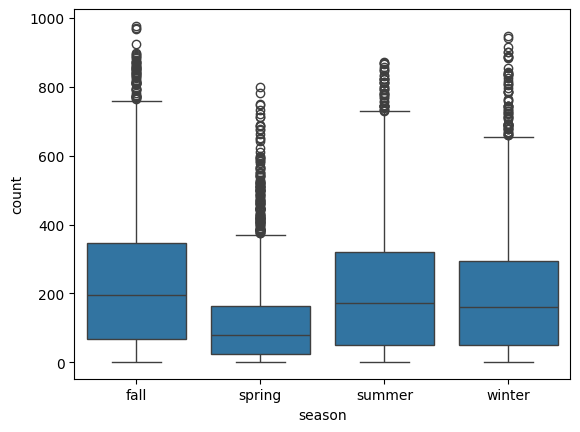

In [215]:
## BoxPlot of seasons vs per hour count

sns.boxplot(data = df, x = "season", y = "count")
plt.show()

**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for winter,fall, summer, spring.

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for winter,fall, summer, spring.

**STEP-2** : Checking for basic assumpitons for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

**STEP-3**: Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

Under H0, the test statistic should follow F-Distribution.

**STEP-4**: Decide the kind of test.

We will be performing right tailed f-test

**STEP-5**: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

**STEP-6**: Compare p-value and alpha.

Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

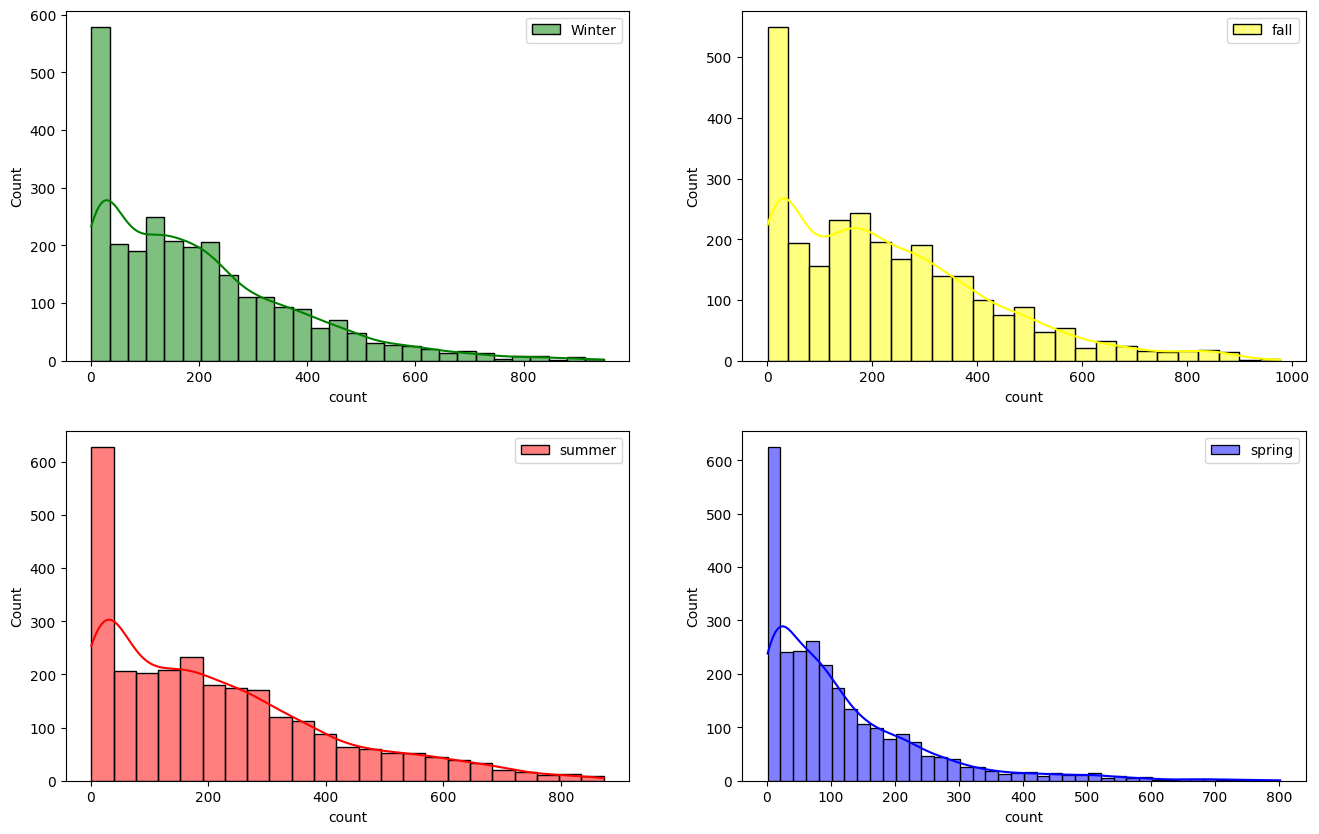

In [217]:
#### Distribution of different seasons
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
sns.histplot(data = df_winter, x = "count", kde = True, color = "green", label = "Winter")
plt.legend()

plt.subplot(2,2,2)
sns.histplot(data = df_fall, x = "count", kde = True, color = "yellow", label = "fall")
plt.legend()

plt.subplot(2,2,3)
sns.histplot(data = df_summer, x = "count", kde = True, color = "red", label = "summer")
plt.legend()

plt.subplot(2,2,4)
sns.histplot(data = df_spring, x = "count", kde = True, color = "blue", label = "spring")
plt.legend()

plt.show()

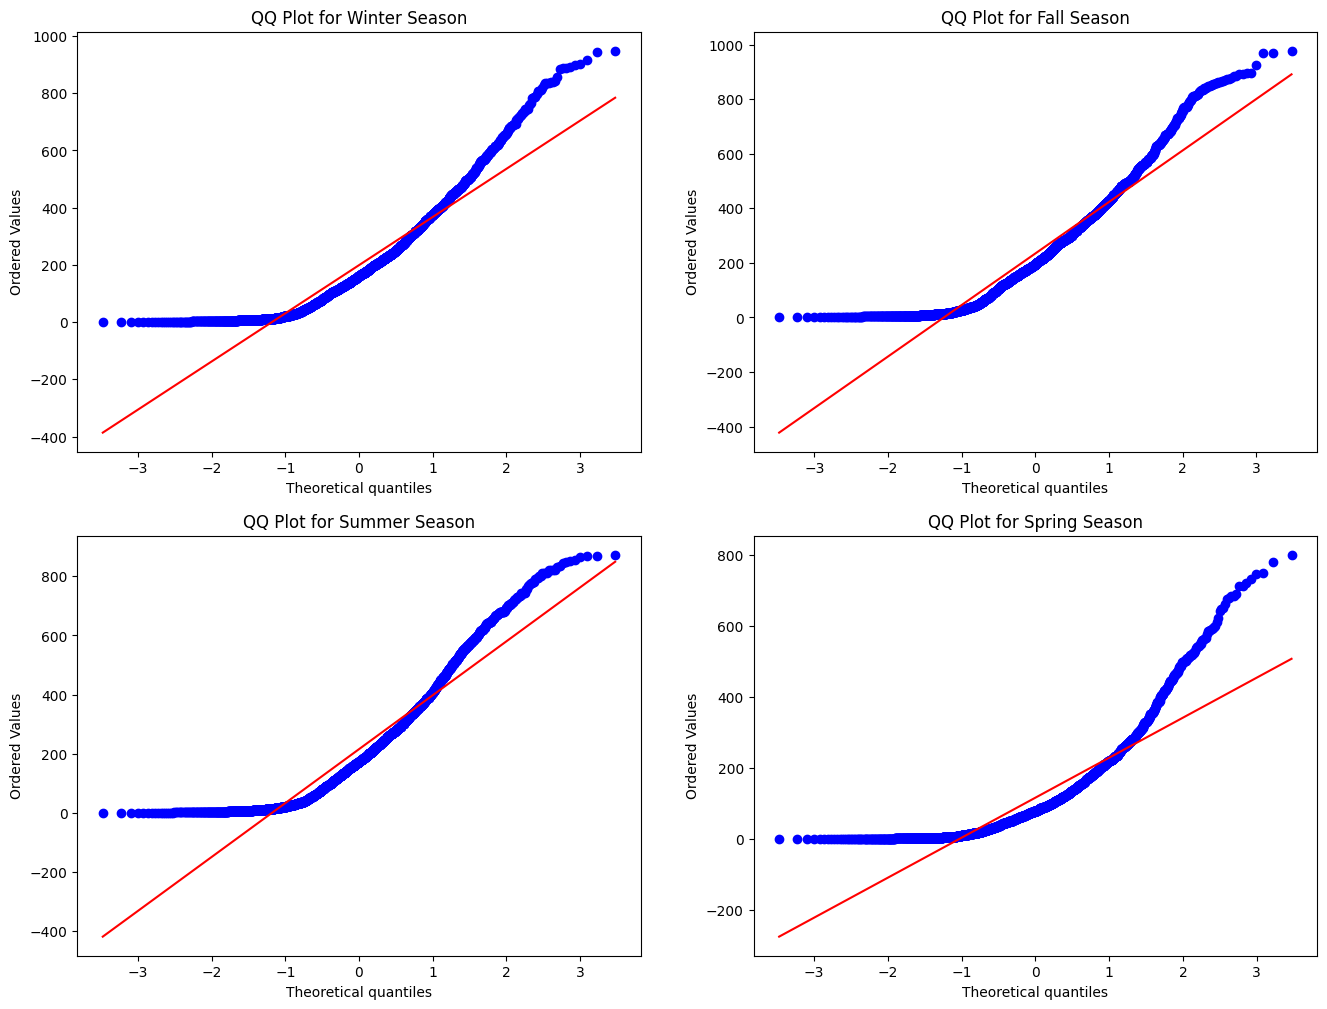

In [227]:
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
probplot(df_winter["count"], dist = "norm", plot = plt)
plt.title("QQ Plot for Winter Season")

plt.subplot(2,2,2)
probplot(df_fall["count"], dist = "norm", plot = plt)
plt.title("QQ Plot for Fall Season")

plt.subplot(2,2,3)
probplot(df_summer["count"], dist = "norm", plot = plt)
plt.title("QQ Plot for Summer Season")

plt.subplot(2,2,4)
probplot(df_spring["count"], dist = "norm", plot = plt)
plt.title("QQ Plot for Spring Season")
plt.show()

In [230]:
### Shapiro Test for Winter Season
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_winter["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Winter:\n{p_val}")

P-Values of Sahpiro Test for Winter:
[1.4445689089370717e-10, 1.9434169551413305e-10, 9.311452303650825e-11, 6.76702305302257e-11, 1.0738556571743274e-10]


In [232]:
### Shapiro Test for Fall Season
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_fall["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Fall:\n{p_val}")

P-Values of Sahpiro Test for Fall:
[3.667318226874272e-09, 1.1476195282966728e-07, 2.2646755304389643e-10, 1.1893219742376004e-10, 1.676121880178627e-10]


In [234]:
### Shapiro Test for Summer Season
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_summer["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Summer:\n{p_val}")

P-Values of Sahpiro Test for Summer:
[7.085105835358263e-10, 9.45429623477878e-10, 5.3615736850254336e-11, 3.4660038727984954e-11, 1.4469143938544704e-10]


In [233]:
### Shapiro Test for Spring Season
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_spring["count"].sample(200))
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Spring:\n{p_val}")

P-Values of Sahpiro Test for Spring:
[3.0256573800086428e-15, 3.057761495720533e-14, 1.8535159504776653e-14, 1.2899021120229615e-15, 1.4385526461452997e-14]


From the above P-Values and QQplot we can conclude that no Sample follows Normal Distribution

**Transform data using Boxcox Transformation And Perform Shapiro Test**

In [242]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_winter_boxcox, lambda_winter = boxcox(df_winter["count"])

### Shapiro Test for Winter Season Data Converted via Boxcoc
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_winter_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Transformed Winter Data:\n{p_val}")

P-Values of Sahpiro Test for Transformed Winter Data:
[6.342709865441161e-21, 6.342709865441161e-21, 6.342709865441161e-21, 6.342709865441161e-21, 6.342709865441161e-21]


In [243]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_fall_boxcox, lambda_fall = boxcox(df_fall["count"])

### Shapiro Test for Fall Season Data Converted via Boxcoc.
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_fall_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Transformed Fall Data:\n{p_val}")

P-Values of Sahpiro Test for Transformed Fall Data:
[3.6319999210910884e-22, 3.6319999210910884e-22, 3.6319999210910884e-22, 3.6319999210910884e-22, 3.6319999210910884e-22]


In [244]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_summer_boxcox, lambda_summer = boxcox(df_summer["count"])

### Shapiro Test for Summer Season Data Converted via Boxcoc.
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_summer_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Transformed Summer Data:\n{p_val}")

P-Values of Sahpiro Test for Transformed Summer Data:
[2.7910560207702335e-22, 2.7910560207702335e-22, 2.7910560207702335e-22, 2.7910560207702335e-22, 2.7910560207702335e-22]


In [245]:
## Converting Data using Boxcox
from scipy.stats import boxcox
df_spring_boxcox, lambda_spring = boxcox(df_spring["count"])

### Shapiro Test for Spring Season Data Converted via Boxcoc.
from scipy.stats import shapiro

p_val = []
for i in range(0,5):
  t_test, p_value = shapiro(df_spring_boxcox)
  p_val.append(p_value)
print(f"P-Values of Sahpiro Test for Transformed Spring Data:\n{p_val}")

P-Values of Sahpiro Test for Transformed Spring Data:
[1.7082116755999925e-17, 1.7082116755999925e-17, 1.7082116755999925e-17, 1.7082116755999925e-17, 1.7082116755999925e-17]


From the above P-Values after converting Data using boxcox transformation we can conclude that no Sample follows Normal Distribution

**Levene Test**

In [246]:
#### Levene Test
from scipy.stats import levene

test_stat, p_value = levene(df_winter['count'].sample(2500), df_fall['count'].sample(2500), df_summer['count'].sample(2500), df_spring["count"].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.3918103809050437e-109
The samples do not have  Homogenous Variance


ince the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [248]:
# Ho : Mean no. of cycles rented is same for different seasons
# Ha : Mean no. of cycles rented is different for different seasons
# Assuming significance Level to be 0.05
from scipy.stats import kruskal

alpha = 0.05
test_stat, p_value = kruskal(df_winter["count"], df_fall["count"], df_summer["count"], df_spring["count"])
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 699.6668548181915
p value = 2.4790083726176776e-151
Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different seasons.

# **Check if the Weather conditions are significantly different during different Seasons?**

In [258]:
df[["weather","season"]].describe()

,weather,season
count,10886,10886
unique,4,4
top,Clear or Few Clouds,winter
freq,7192,2734


It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.


**STEP-1** : Set up Null Hypothesis

Null Hypothesis ( H0 ) - weather is independent of season

Alternate Hypothesis ( HA ) - weather is dependent of seasons.

**STEP-2**: Define Test statistics

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

**STEP-3**: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

The data in the cells should be frequencies, or counts of cases.
The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
There are 2 variables, and both are measured as categories.
The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).
**STEP-4**: Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

**STEP-5**: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

In [272]:
## Creating Crosstab
pd.crosstab(index = df["season"], columns = df["weather"], values = df["count"], aggfunc = np.sum)

## Remove Heavy Rain weather column as it has less than 5 values and for Chisqaure test minimum 5 Values are required

cross_tab = pd.crosstab(index = df["season"], columns = df[df["weather"] != "Heavy Rain"]["weather"], values = df["count"], aggfunc = np.sum).drop(columns = ["Heavy Rain"])

cross_tab

weather,Clear or Few Clouds,Light Rain,Mist and Cloudy
season,,,
fall,470116,31160,139386
spring,223009,12919,76406
summer,426350,27755,134177
winter,356588,30255,157191


In [274]:
from scipy.stats import chi2_contingency
chi_test_stat, p_value, dof, expected = chi2_contingency(cross_tab)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)
print('-' * 65)
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 10838.372332480216
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396  31364.39195574 155812.72247031]
 [221081.86259035  15290.69305984  75961.44434981]
 [416408.3330293   28800.06497733 143073.60199337]
 [385087.91880639  26633.8500071  132312.23118651]]
-----------------------------------------------------------------
Reject Null Hypothesis


Therefore, there is statistically significant dependency of weather and season based on the number of bikes rented.


# **Insights**

The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

Out of every 100 users, around 19 are casual users and 81 are registered users.

The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

More than 80 % of the time, the temperature is less than 28 degrees celcius.

More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

More than 85 % of the total, windspeed data has a value of less than 20.

The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.

There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.

The hourly total number of rental bikes is statistically different for different weathers.

There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
The hourly total number of rental bikes is statistically different for different seasons.

# **Recommendations**

**Seasonal Marketing:** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

**Time-based Pricing:** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

**Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

**User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

**Optimize Inventory:** Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

**Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

**Customer Comfort:** Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

**Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

**Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

**Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

**Social Media Marketing:** Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

**Special Occasion Discounts:** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.